In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('all_the_data_rmOutliers.csv')

In [3]:
df.mouse_details_strain.unique()

array(['BW', 'BWPOF2', 'PO', 'BWPOF1'], dtype=object)

In [4]:
df = df[df.mouse_details_sex.isin(['M', 'F'])]
df = df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1', 'BWPOF2'])]
df['Sex'] = df['mouse_details_sex'].apply(lambda x: 'Male' if x == 'M' else 'Female')

In [5]:
var = 'mouse_dimensions_mouseLength'
df_2 = df[['mouse_details_strain', 'mouse_details_sex', 'Sex', var]]
df_2.head(10)

,mouse_details_strain,mouse_details_sex,Sex,mouse_dimensions_mouseLength
0,BW,M,Male,7.260598
1,BW,M,Male,7.118170
2,BWPOF2,F,Female,7.168398
3,BWPOF2,F,Female,7.118569
4,PO,F,Female,6.785503
5,PO,F,Female,6.252075
6,PO,F,Female,6.363449
7,BWPOF2,M,Male,6.713208
8,BWPOF2,M,Male,6.911091
9,BWPOF2,M,Male,6.294963


In [6]:
def detect_outlier(data_1):
    outliers = []
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
detect_outlier(df[var])

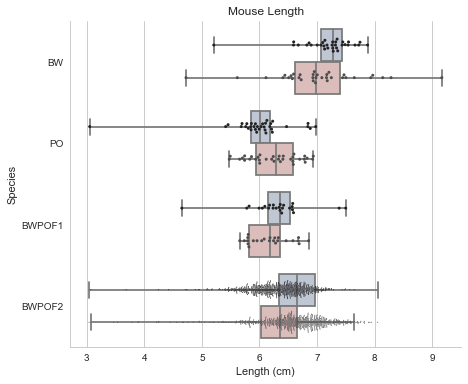

In [101]:
var = 'mouse_dimensions_mouseLength'
sns.set(style="ticks")
sns.set_style("whitegrid")

df2 = df[df[var] > 3]

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', 
               data=df2, whis="range", palette="vlag", 
               order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'] )

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df2[df2.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", linewidth=0, dodge = True, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df2[df2.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", linewidth=0, dodge = True, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Tweak the visual presentation
ax.set_title("Mouse Length")
ax.xaxis.grid(True)
ax.legend_.remove()
ax.set(ylabel="Species", xlabel = "Length (cm)")
#ax.ylim(min(df[var], max(df[var])))
sns.despine()
f.savefig("PosterPlots/"+ 'cc_fig2_outliers' + ".pdf")

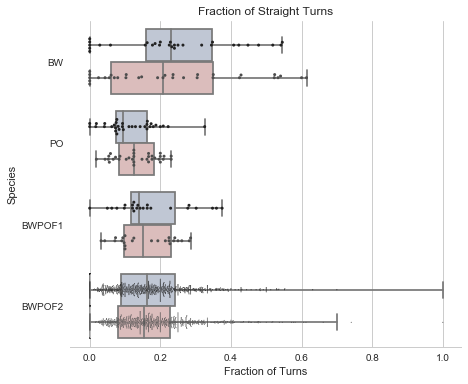

In [104]:
var = "turning_preferences_fraction_straight"
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")#, inner = None)

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Fraction of Straight Turns")
ax.xaxis.grid(True)
ax.legend_.remove()
ax.set(ylabel="Species", xlabel = "Fraction of Turns")
sns.despine(left = True)
f.savefig("PosterPlots/"+   'cc_Fig2_1' + ".pdf")

In [ ]:
var = "turning_preferences_fraction_left"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Turn Preference Left")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

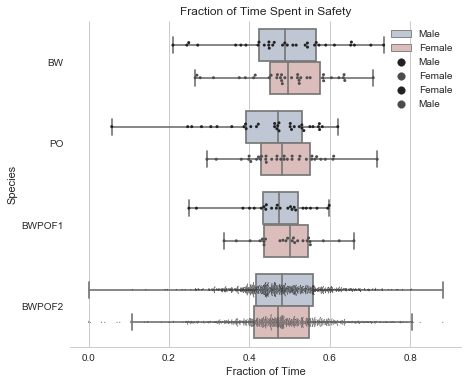

In [78]:
var = "safety_fraction_closed_arms"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Fraction of Time Spent in Safety")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ "cc_fig2_7" + ".pdf")

In [ ]:
var = "fraction_in_arms_closed"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Fration in Closed Arms")
ax.xaxis.grid(True)
ax.legend(loc=2)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

In [ ]:
var = "velocity_closed_towards_outside_average_speed_active"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title(var)
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Velocity")
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

df[df.mouse_dimensions_mouseLength == min(df.mouse_dimensions_mouseLength)] df = df.drop([402])

df[df.backtrack_counts_CL == max(df.backtrack_counts_CL)]
df = df.drop([725])

df[df.velocity_OB_total_average_speed == max(df.velocity_OB_total_average_speed)]
df = df.drop([27])

df[df.peeking_average_length_CL == max(df.peeking_average_length_CL)]
df = df.drop([857])

df[df.velocity_OB_total_median_speed_active == max(df.velocity_OB_total_median_speed_active)]
df = df.drop([1617])

df[df.velocity_OT_down_median_speed_active > max(df.velocity_OT_total_median_speed_active-4)]
df = df.drop([7])

df.to_csv('all_the_data_rmOutliers.csv', index = False)

max(df.velocity_OT_total_median_speed_active)

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import SeabornFig2Grid as sfg


from sklearn import preprocessing

(0, 30)
backtrack_counts_CL
backtrack_counts_CR
backtrack_counts_OB
backtrack_counts_OT
backtrack_counts_total
backtrack_counts_total_closed
backtrack_counts_total_open
fraction_in_arms_bottom
fraction_in_arms_closed
fraction_in_arms_closed_and_middle
fraction_in_arms_left
fraction_in_arms_middle
fraction_in_arms_open
fraction_in_arms_right
fraction_in_arms_top
frames_in_arms_CL
frames_in_arms_CR
frames_in_arms_M
frames_in_arms_OB
frames_in_arms_OT
mouse_dimensions_mouseLength
mouse_dimensions_mouseSize
mouse_dimensions_mouseWidth
peeking_average_length_CL
peeking_average_length_CR
peeking_average_length_M
peeking_average_length_total
peeking_count_CL
peeking_count_CR
peeking_count_M


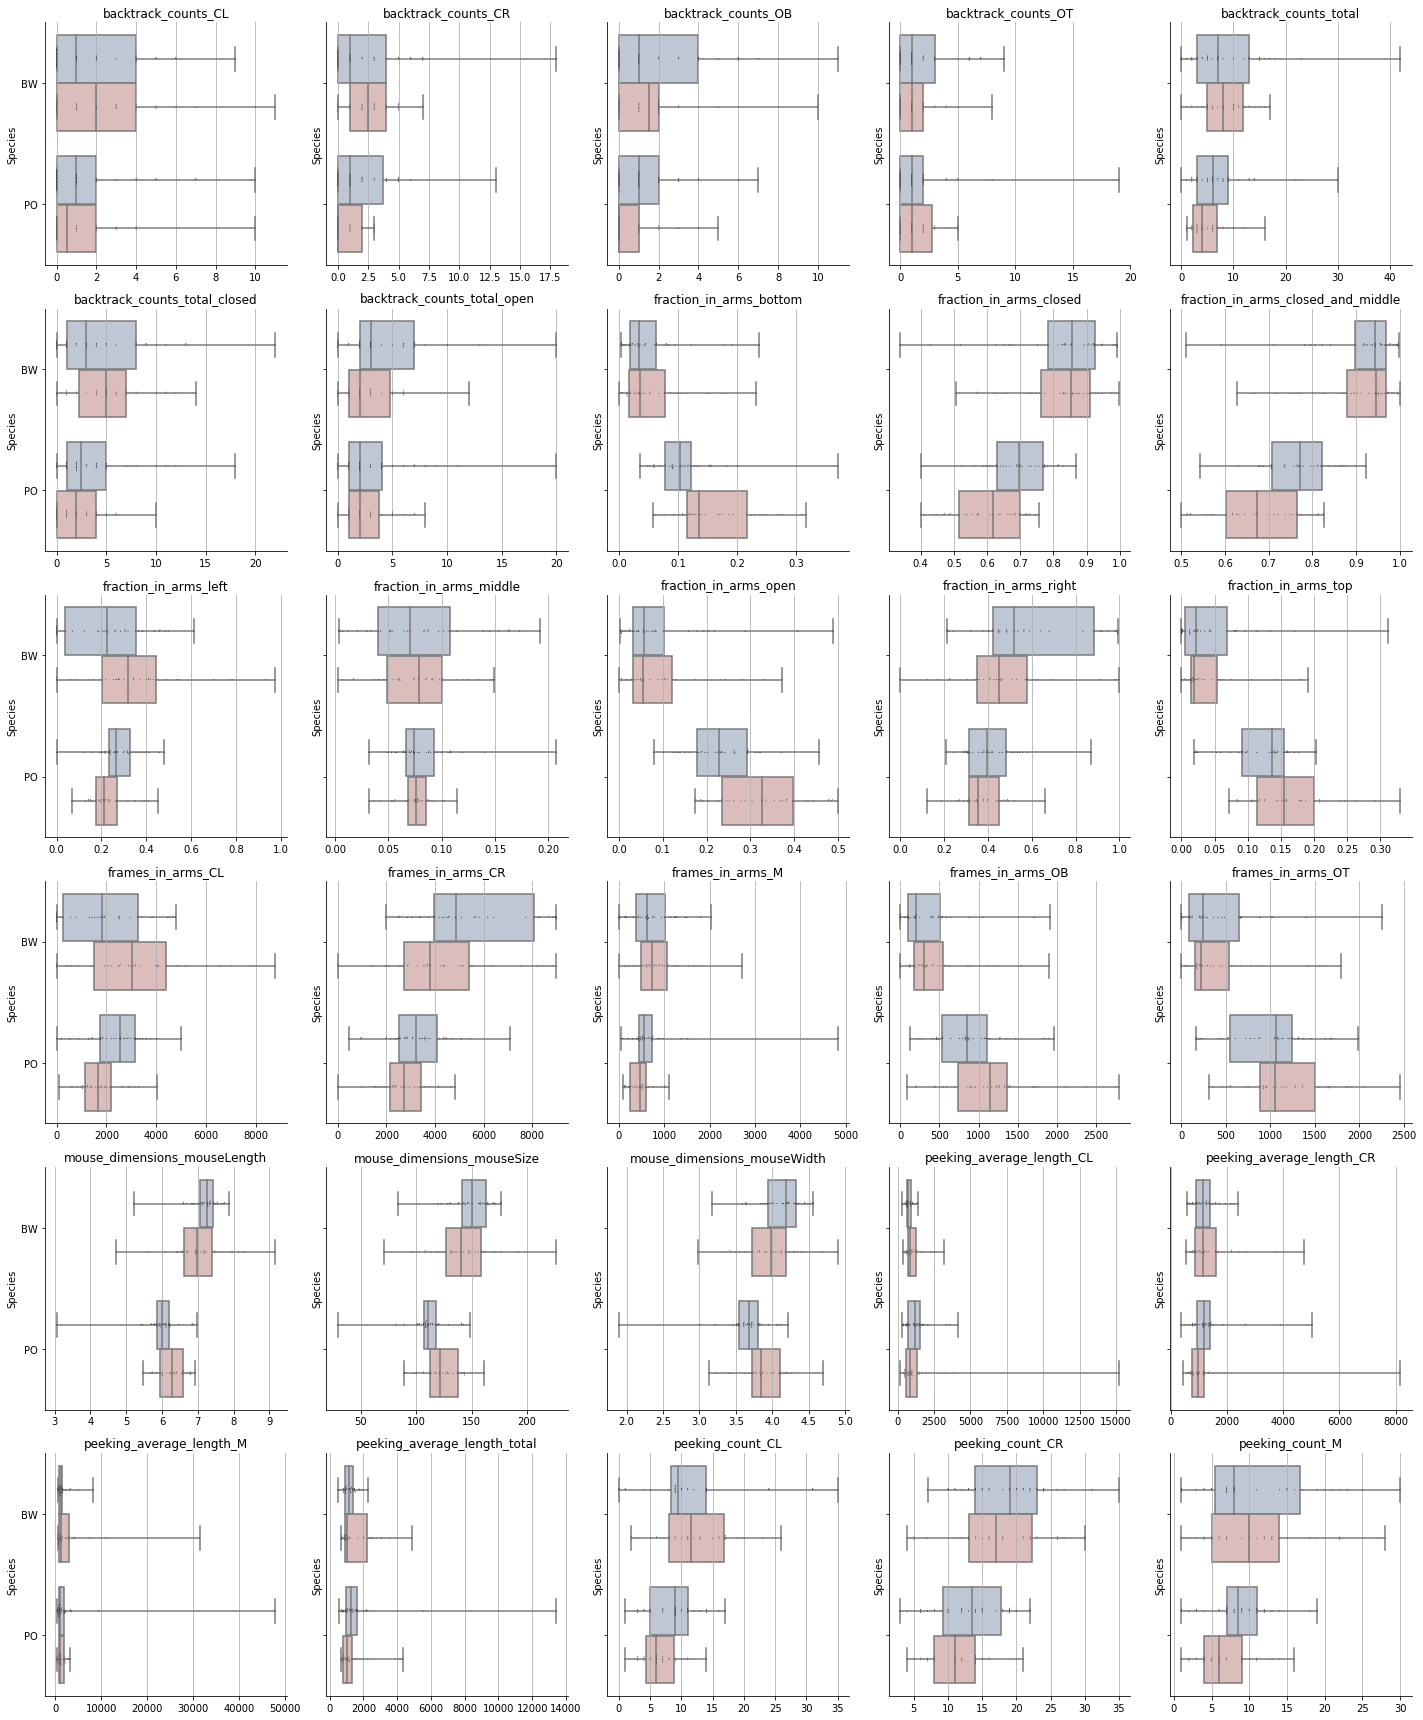

(30, 60)
peeking_count_total
peeking_fraction_CL
peeking_fraction_CR
peeking_fraction_M
peeking_fraction_total
peeking_median_length_CL
peeking_median_length_CR
peeking_median_length_M
peeking_median_length_total
rest_fraction_CL
rest_fraction_CR
rest_fraction_M
rest_fraction_OB
rest_fraction_OT
rest_fraction_all_arms
rest_fraction_closed_arms
rest_fraction_open_arms
safety_and_rest_fraction_CL
safety_and_rest_fraction_CR
safety_and_rest_fraction_closed_arms
safety_fraction_CL
safety_fraction_CR
safety_fraction_closed_arms
tot_arm_entries_OB
tot_arm_entries_OT
total_distance_CL
total_distance_CR
total_distance_F1
total_distance_F2
total_distance_F3


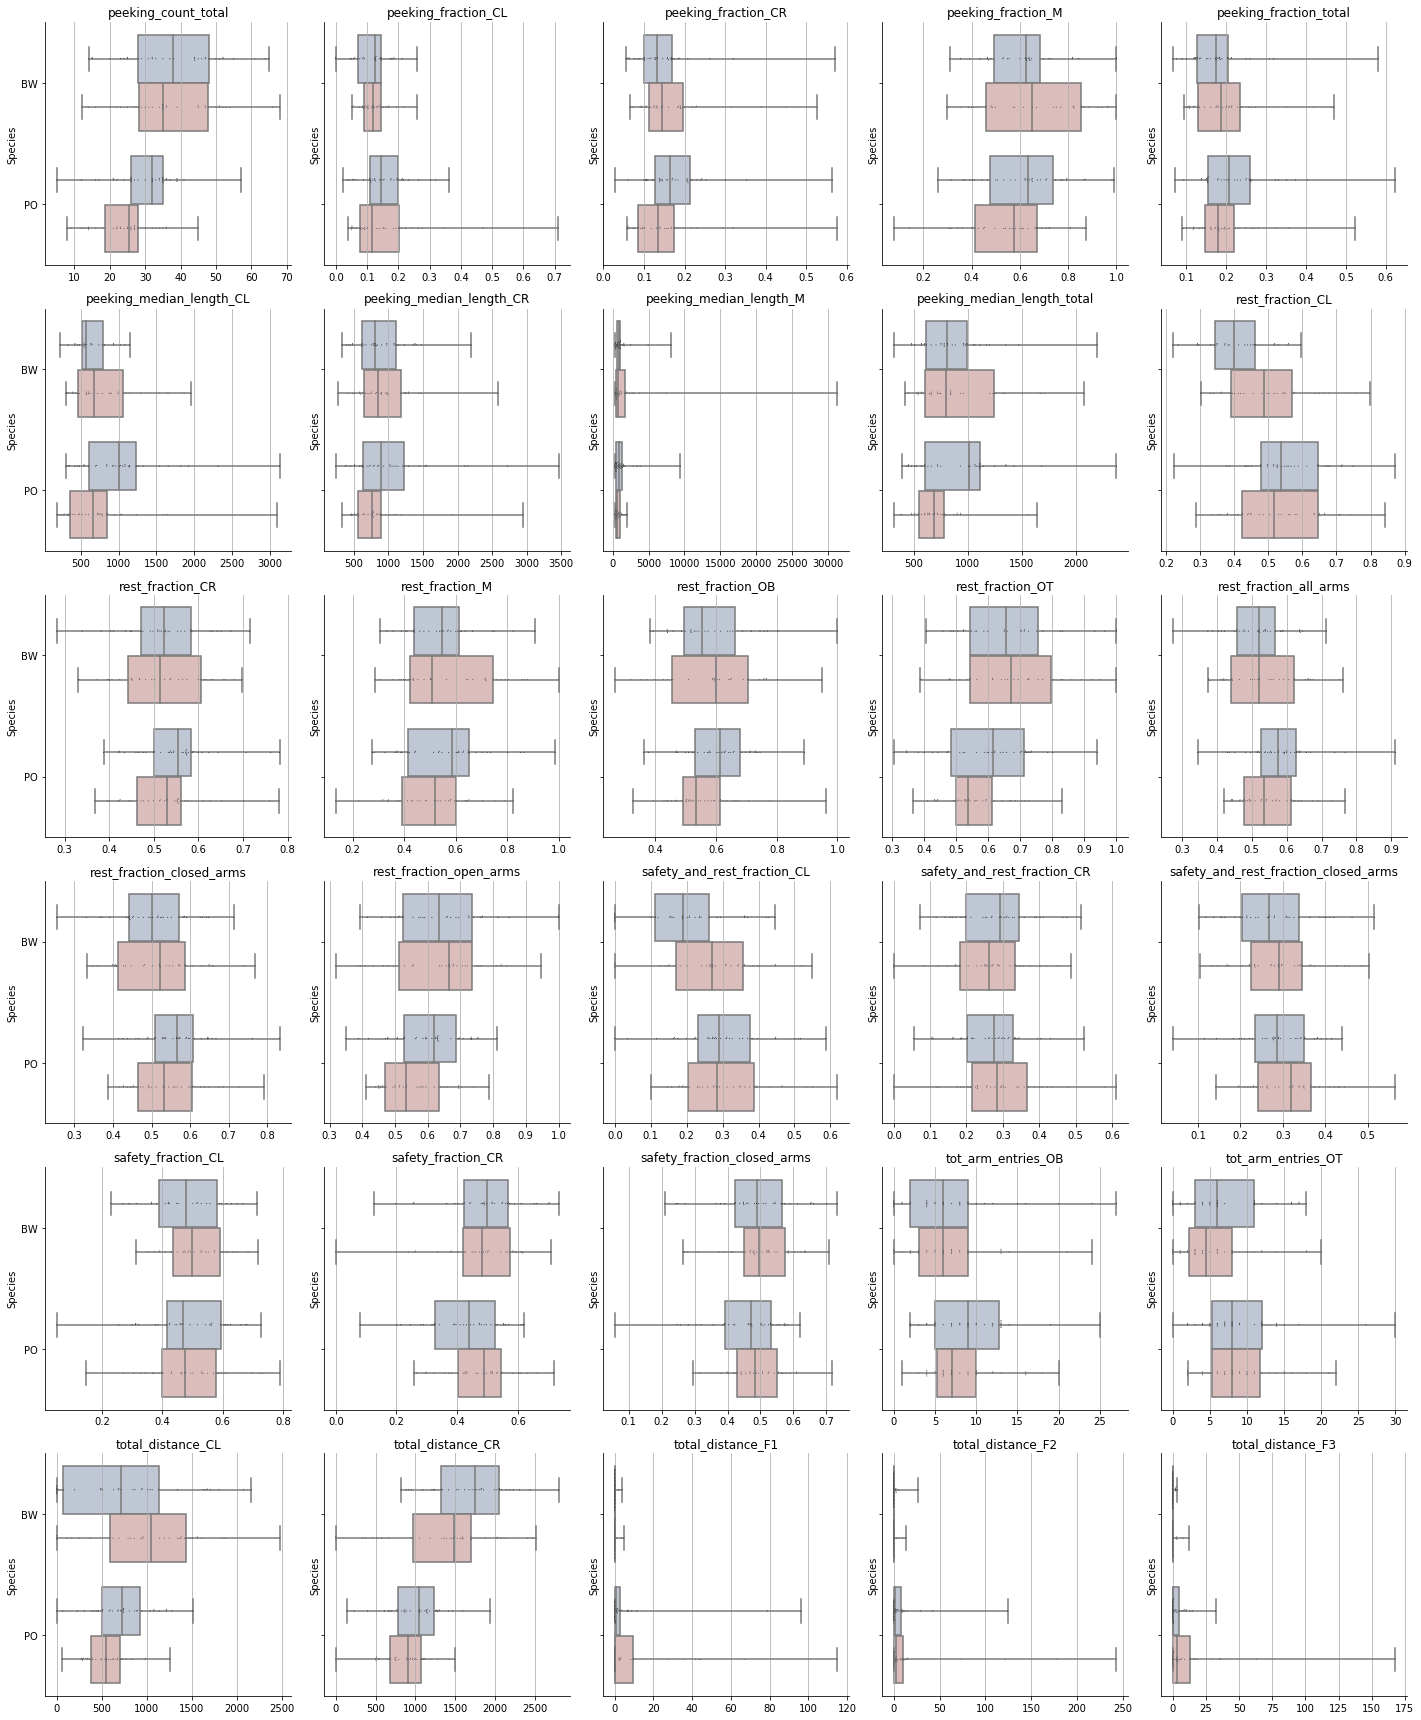

(60, 90)
total_distance_F4
total_distance_M
total_distance_OB
total_distance_OT
total_distance_closed
total_distance_open
turning_preferences_fraction_back
turning_preferences_fraction_back_into_closed
turning_preferences_fraction_back_into_open
turning_preferences_fraction_back_only_straight_back
turning_preferences_fraction_back_only_straight_back_into_closed
turning_preferences_fraction_back_only_straight_back_into_open
turning_preferences_fraction_left
turning_preferences_fraction_left_into_closed
turning_preferences_fraction_left_into_open
turning_preferences_fraction_left_only_right_left
turning_preferences_fraction_left_only_right_left_into_closed
turning_preferences_fraction_left_only_right_left_into_open
turning_preferences_fraction_right
turning_preferences_fraction_right_into_closed
turning_preferences_fraction_right_into_open
turning_preferences_fraction_right_only_right_left
turning_preferences_fraction_right_only_right_left_into_closed
turning_preferences_fraction_right_o

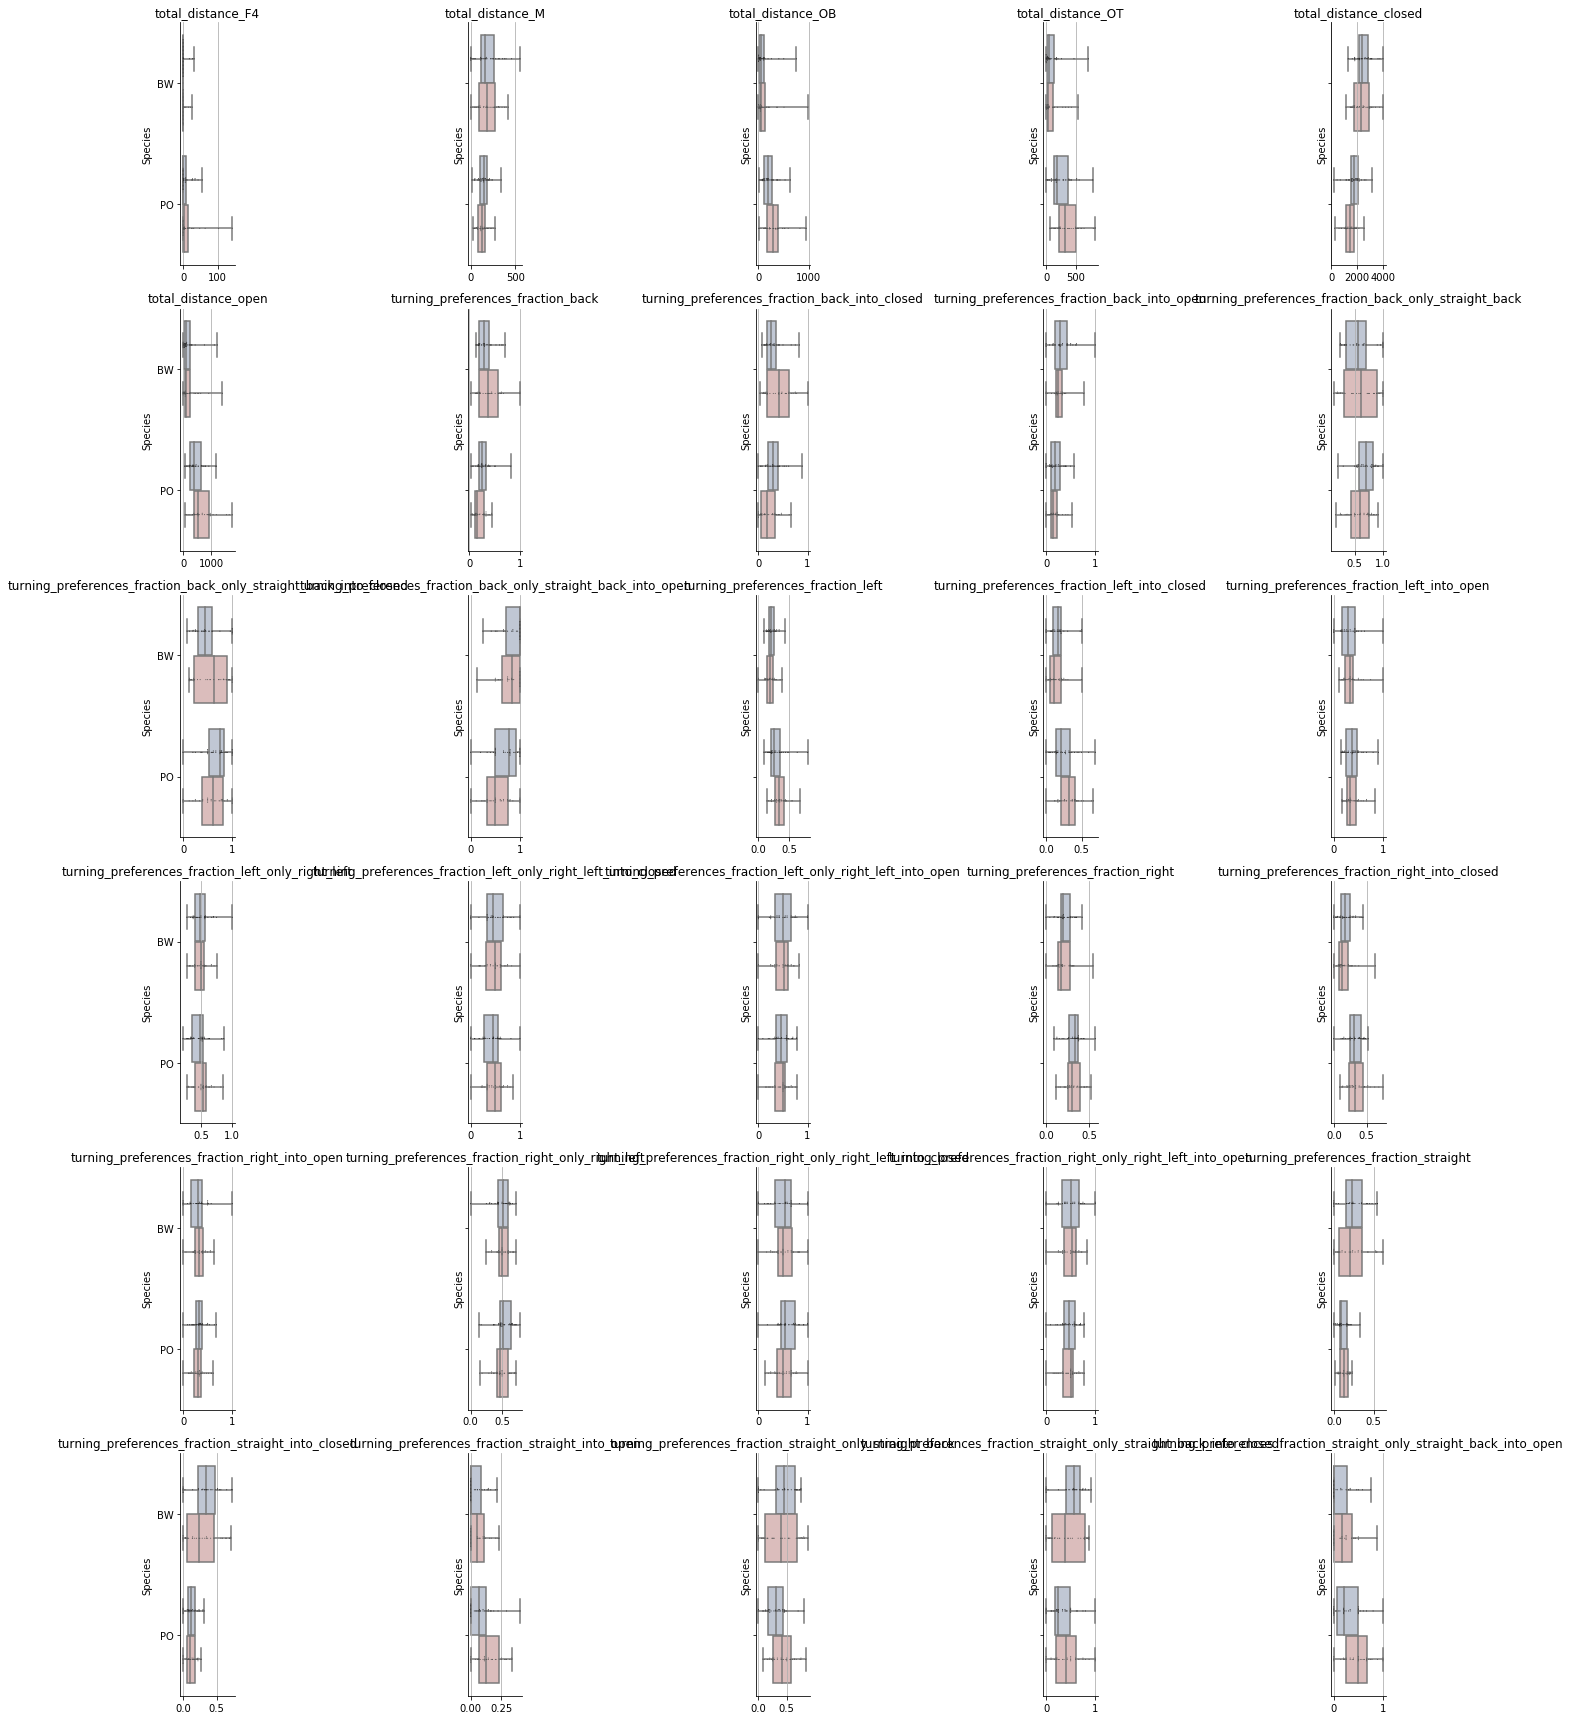

(90, 120)
turning_preferences_num_total
turning_preferences_num_total_into_closed
turning_preferences_num_total_into_open
velocity_CL_down_average_speed
velocity_CL_down_average_speed_active
velocity_CL_down_median_speed
velocity_CL_down_median_speed_active
velocity_CL_left_average_speed
velocity_CL_left_average_speed_active
velocity_CL_left_median_speed
velocity_CL_left_median_speed_active
velocity_CL_right_average_speed
velocity_CL_right_average_speed_active
velocity_CL_right_median_speed
velocity_CL_right_median_speed_active
velocity_CL_total_average_speed
velocity_CL_total_average_speed_active
velocity_CL_total_median_speed
velocity_CL_total_median_speed_active
velocity_CL_up_average_speed
velocity_CL_up_average_speed_active
velocity_CL_up_median_speed
velocity_CL_up_median_speed_active
velocity_CR_down_average_speed
velocity_CR_down_average_speed_active
velocity_CR_down_median_speed
velocity_CR_down_median_speed_active
velocity_CR_left_average_speed
velocity_CR_left_average_speed_

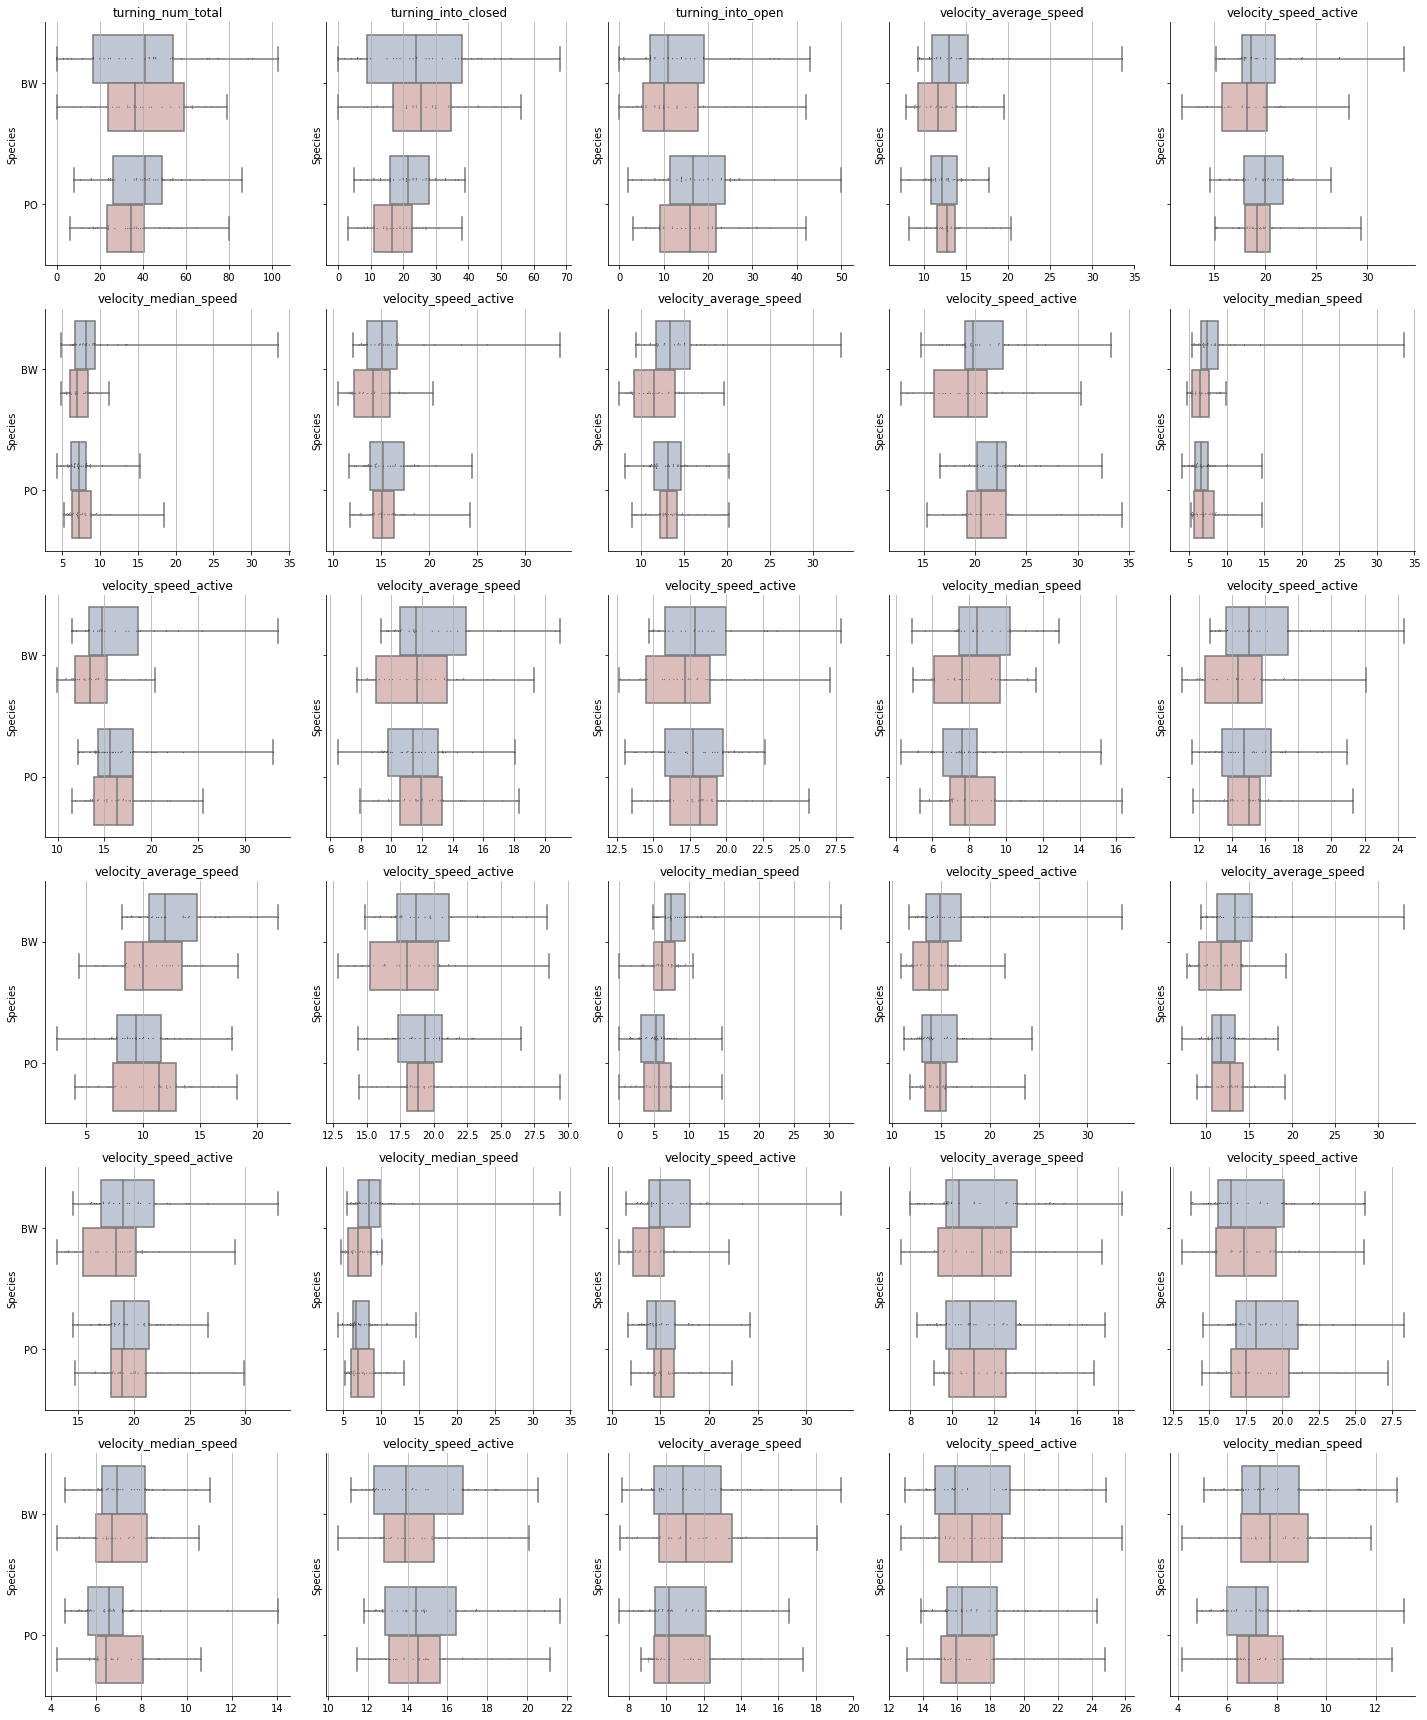

(120, 150)
velocity_CR_left_median_speed_active
velocity_CR_right_average_speed
velocity_CR_right_average_speed_active
velocity_CR_right_median_speed
velocity_CR_right_median_speed_active
velocity_CR_total_average_speed
velocity_CR_total_average_speed_active
velocity_CR_total_median_speed
velocity_CR_total_median_speed_active
velocity_CR_up_average_speed
velocity_CR_up_average_speed_active
velocity_CR_up_median_speed
velocity_CR_up_median_speed_active
velocity_M_down_average_speed
velocity_M_down_average_speed_active
velocity_M_down_median_speed
velocity_M_down_median_speed_active
velocity_M_left_average_speed
velocity_M_left_average_speed_active
velocity_M_left_median_speed
velocity_M_left_median_speed_active
velocity_M_right_average_speed
velocity_M_right_average_speed_active
velocity_M_right_median_speed
velocity_M_right_median_speed_active
velocity_M_total_average_speed
velocity_M_total_average_speed_active
velocity_M_total_median_speed
velocity_M_total_median_speed_active
velocity

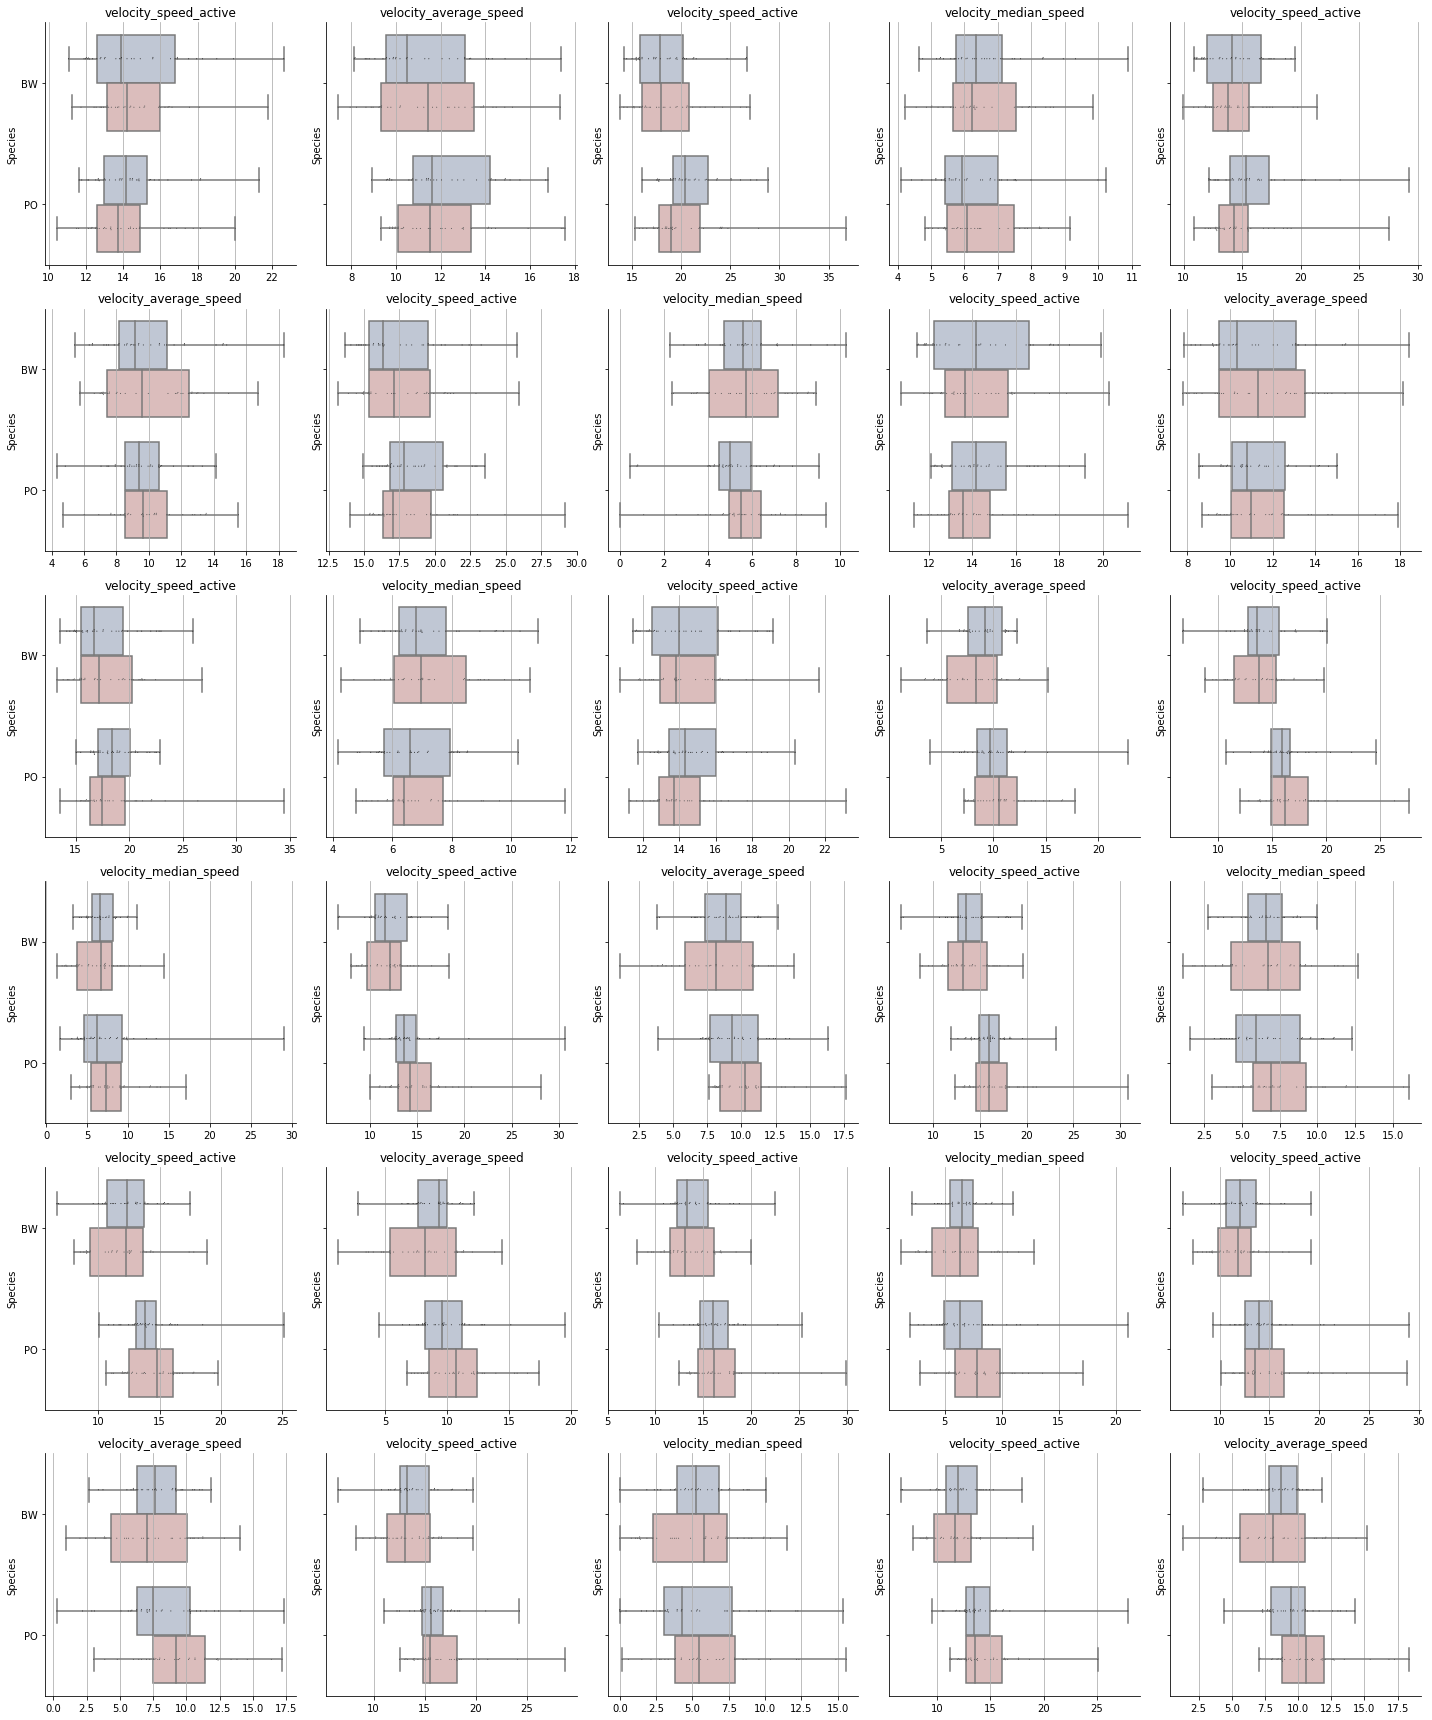

(150, 180)
velocity_M_up_average_speed_active
velocity_M_up_median_speed
velocity_M_up_median_speed_active
velocity_OB_down_average_speed
velocity_OB_down_average_speed_active
velocity_OB_down_median_speed
velocity_OB_down_median_speed_active
velocity_OB_left_average_speed
velocity_OB_left_average_speed_active
velocity_OB_left_median_speed
velocity_OB_left_median_speed_active
velocity_OB_right_average_speed
velocity_OB_right_average_speed_active
velocity_OB_right_median_speed
velocity_OB_right_median_speed_active
velocity_OB_total_average_speed
velocity_OB_total_average_speed_active
velocity_OB_total_median_speed
velocity_OB_total_median_speed_active
velocity_OB_up_average_speed
velocity_OB_up_average_speed_active
velocity_OB_up_median_speed
velocity_OB_up_median_speed_active
velocity_OT_down_average_speed
velocity_OT_down_average_speed_active
velocity_OT_down_median_speed
velocity_OT_down_median_speed_active
velocity_OT_left_average_speed
velocity_OT_left_average_speed_active
velocity

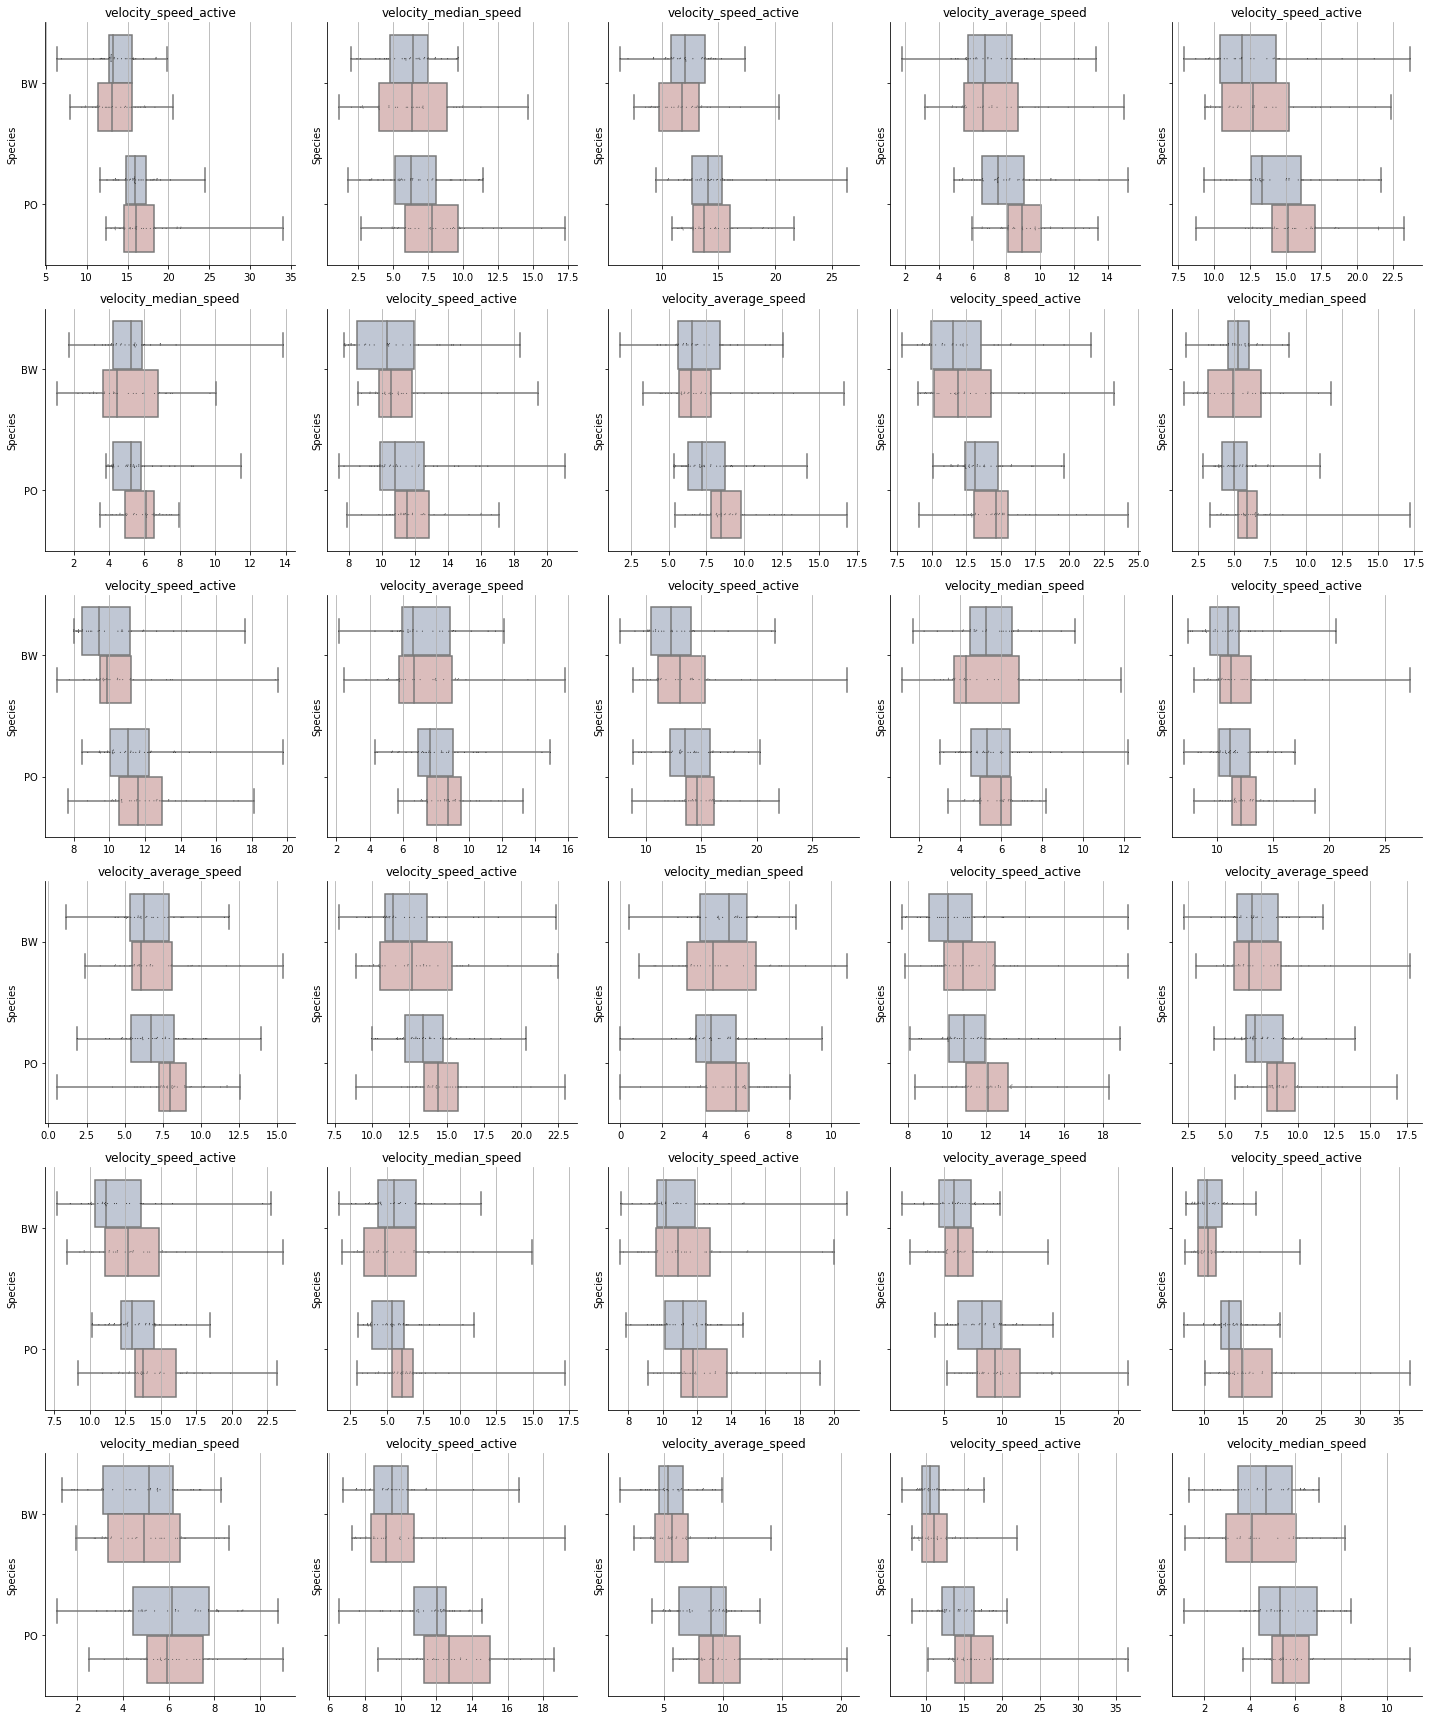

(180, 209)
velocity_OT_left_median_speed_active
velocity_OT_right_average_speed
velocity_OT_right_average_speed_active
velocity_OT_right_median_speed
velocity_OT_right_median_speed_active
velocity_OT_total_average_speed
velocity_OT_total_average_speed_active
velocity_OT_total_median_speed
velocity_OT_total_median_speed_active
velocity_OT_up_average_speed
velocity_OT_up_average_speed_active
velocity_OT_up_median_speed
velocity_OT_up_median_speed_active
velocity_closed_towards_middle_average_speed
velocity_closed_towards_middle_average_speed_active
velocity_closed_towards_middle_median_speed
velocity_closed_towards_middle_median_speed_active
velocity_closed_towards_outside_average_speed
velocity_closed_towards_outside_average_speed_active
velocity_closed_towards_outside_median_speed
velocity_closed_towards_outside_median_speed_active
velocity_open_towards_middle_average_speed
velocity_open_towards_middle_average_speed_active
velocity_open_towards_middle_median_speed
velocity_open_towards

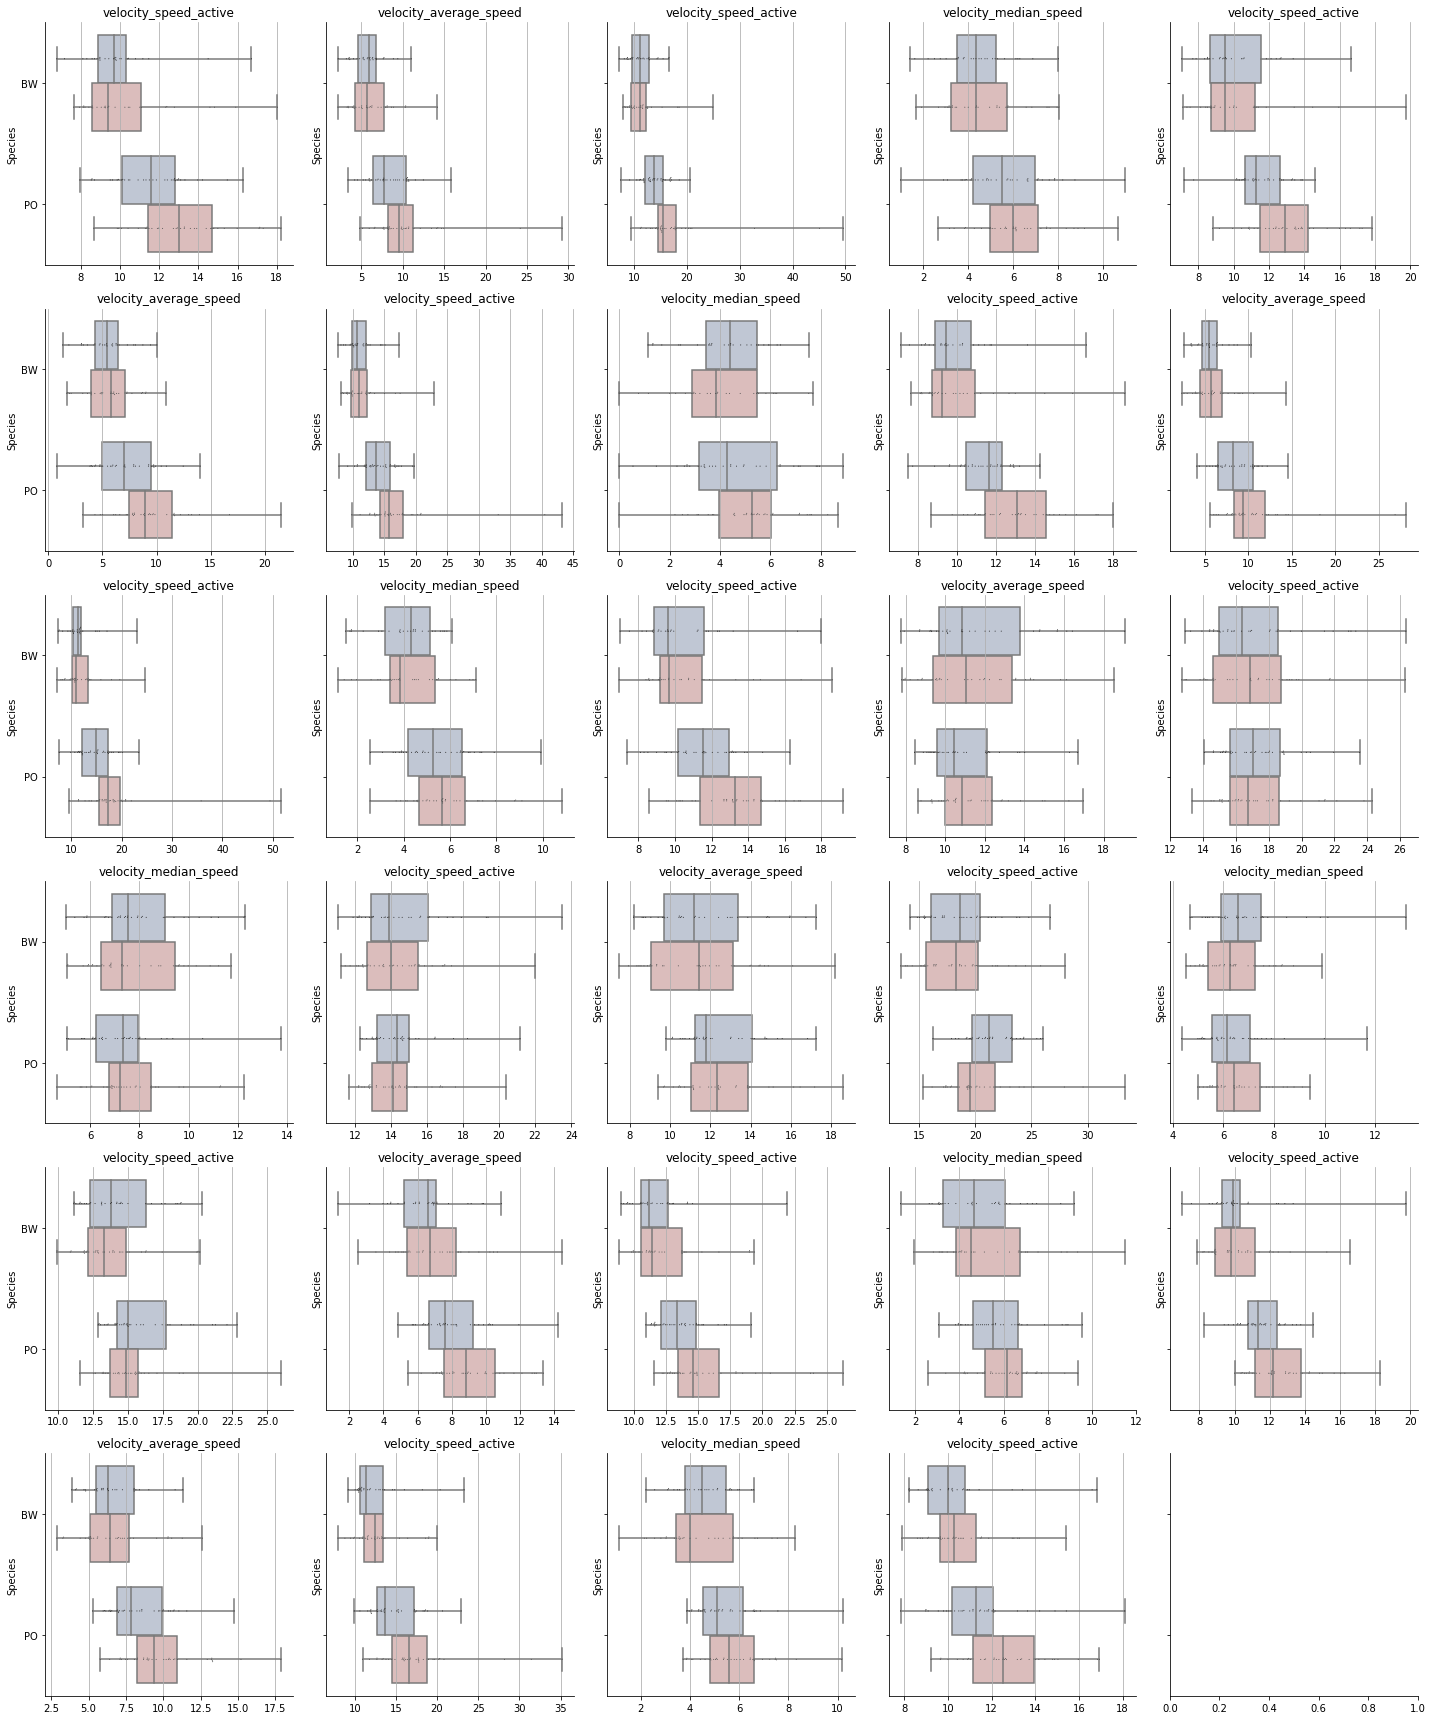

In [10]:
columns = pd.DataFrame(df.columns)

col_to_ignore = ['inner_directory',
                'mouse_details_EPM',
                'mouse_details_date',
                'mouse_details_mouseID',
                'mouse_details_sex',
                'mouse_details_strain',
                'mouse_details_time',
                'Unnamed: 0',
                'Sex',
                "tot_arm_entries_CL",
                "tot_arm_entries_CR",
                "tot_arm_entries_F1",
                "tot_arm_entries_F2",
                "tot_arm_entries_F3",
                "tot_arm_entries_F4",
                "tot_arm_entries_M"]

columns = columns[columns.isin(col_to_ignore) == False].dropna()[0]


split = 30
sp = np.append(np.arange(split, len(columns), split), len(columns)/split  *split  + len(columns)%split)
i_0 = 0

for i in sp:
    print(i_0, i)
    fig, ax = plt.subplots(6,5, figsize=(20, 24), sharey= True)
    ax = ax.flatten()
    for axes, var in zip(ax, columns[i_0:i]):
        print(var)
        # Plot the orbital period with horizontal boxes
        sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data = df,
                   order = ['BW', 'PO'], whis="range", palette="vlag", ax = axes)

        # Add in points to show each observation
        sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', data = df,
                      size=3, color=".3", dodge = True, linewidth=0, 
                      order = ['BW', 'PO'], ax = axes)

        if (i < 96):
            axes.set_title(var)
        else:
            title_array = var.split('_')
            title = title_array[0] + '_' + title_array[len(title_array)-2] + '_' + title_array[len(title_array)-1]
            axes.set_title(str(title))
        axes.xaxis.grid(True)
        axes.legend_.remove()
        axes.set(ylabel="Species", xlabel = '')
        sns.despine()

    plt.tight_layout()  
    plt.show()
    fig.savefig("PosterPlots/"+ str(i_0)+ '_' + str(i) + ".pdf")
    i_0 = i



In [69]:
split = 32
sp = np.append(np.arange(split, len(columns), split), len(columns)/split  *split  + len(columns)%split)
i_0 = 0
for i in sp:
    print(i_0, i)
    i_0 = i+1

(0, 32)
(33, 64)
(65, 96)
(97, 128)
(129, 160)
(161, 192)
(193, 218)


In [63]:
len(columns)

218

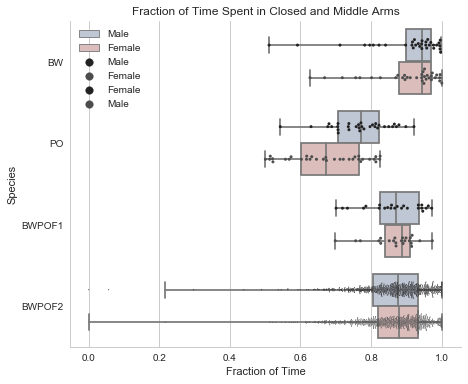

In [21]:
var = 'fraction_in_arms_closed_and_middle'
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title('Fraction of Time Spent in Closed and Middle Arms')
ax.xaxis.grid(True)
ax.legend(loc=2)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

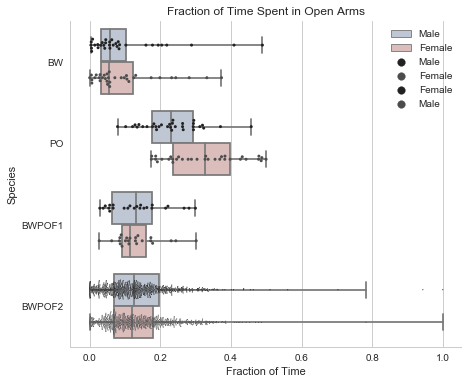

In [25]:
var = 'fraction_in_arms_open'
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1.1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title('Fraction of Time Spent in Open Arms')
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

In [36]:
df['count'] = 1 
gen_sp_count = df[["mouse_details_strain", 'Sex', 'count']].groupby(["mouse_details_strain", 'Sex'], as_index=False).agg('count')
#gen_sp_count["mouse_details_strain"] = gen_sp_count.index
gen_sp_count

,mouse_details_strain,Sex,count
0,BW,Female,34
1,BW,Male,33
2,BWPOF1,Female,24
3,BWPOF1,Male,24
4,BWPOF2,Female,770
5,BWPOF2,Male,808
6,PO,Female,34
7,PO,Male,34


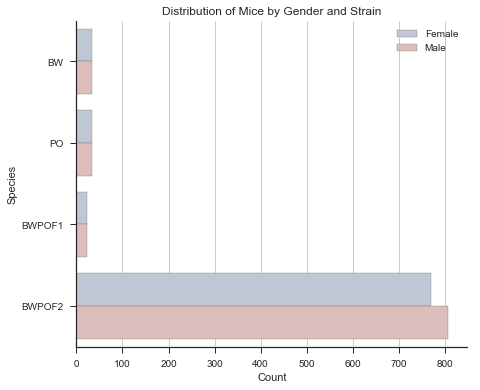

In [51]:
sns.set(style="ticks")
#sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.barplot(x='count', y="mouse_details_strain", hue = 'Sex', data=gen_sp_count,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'], palette="vlag",errcolor=".4", edgecolor=".4")

ax.set_title('Distribution of Mice by Gender and Strain')
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Count")
sns.despine()
f.savefig("PosterPlots/"+ "Gen_Strain_Count" + ".pdf")

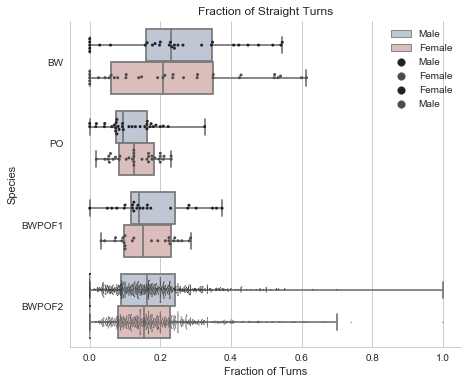

In [76]:
var = 'turning_preferences_fraction_straight'
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1.1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title('Fraction of Straight Turns')
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Turns")
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

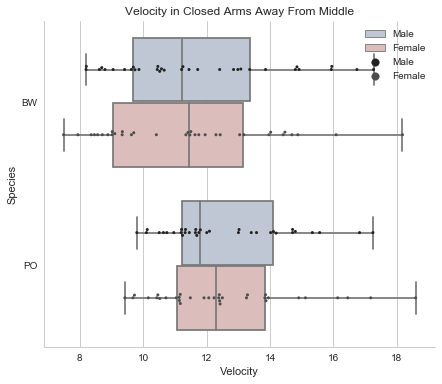

In [81]:
var = 'velocity_closed_towards_outside_average_speed'
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO'])

# Add in points to show each observation
#sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
#              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
#              size=1.1, color=".3", dodge = True, linewidth=0, 
#              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title('Velocity in Closed Arms Away From Middle')
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Velocity")
sns.despine()
f.savefig("PosterPlots/"+ 'cc_fig2_9'+ ".pdf")

In [106]:
split = 32
sp = np.append(np.arange(split, len(columns), split), len(columns)/split  *split  + len(columns)%split)

(0, 32)
(33, 64)
(65, 96)
(97, 128)
(129, 160)
(161, 192)
(193, 218)
